<a href="https://colab.research.google.com/github/rishi-29-02/Titanic-Survival/blob/main/Titabic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction**

# Data Description

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome 
(also known as the “ground truth”) for each passenger. 

Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth 
for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict 
whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, 
as an example of what a submission file should look like.


In [231]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import  train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [232]:
# load the dataset
#from google.colab import files
#uploaded = files.upload()

In [233]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.width', 100000)
pd.set_option('display.max_columns', 20)
print(train.head())

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


*Analyze the data*

In [234]:
# Types
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [235]:
print(test.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


From above we got that all the features are not numeric.


In [236]:
# describe
print(train.describe(include='all'))

        PassengerId    Survived      Pclass                       Name   Sex         Age       SibSp       Parch  Ticket        Fare        Cabin Embarked
count    891.000000  891.000000  891.000000                        891   891  714.000000  891.000000  891.000000     891  891.000000          204      889
unique          NaN         NaN         NaN                        891     2         NaN         NaN         NaN     681         NaN          147        3
top             NaN         NaN         NaN  Karlsson, Mr. Nils August  male         NaN         NaN         NaN  347082         NaN  C23 C25 C27        S
freq            NaN         NaN         NaN                          1   577         NaN         NaN         NaN       7         NaN            4      644
mean     446.000000    0.383838    2.308642                        NaN   NaN   29.699118    0.523008    0.381594     NaN   32.204208          NaN      NaN
std      257.353842    0.486592    0.836071                        NaN

From describe we got that 
1. Age contains only 714 datasets.
2. Cabin contains only 204 datasets.
3. Emabarked is also missing the two values.

In [237]:
print(test.describe(include='all'))

        PassengerId      Pclass                          Name   Sex         Age       SibSp       Parch    Ticket        Fare            Cabin Embarked
count    418.000000  418.000000                           418   418  332.000000  418.000000  418.000000       418  417.000000               91      418
unique          NaN         NaN                           418     2         NaN         NaN         NaN       363         NaN               76        3
top             NaN         NaN  Nancarrow, Mr. William Henry  male         NaN         NaN         NaN  PC 17608         NaN  B57 B59 B63 B66        S
freq            NaN         NaN                             1   266         NaN         NaN         NaN         5         NaN                3      270
mean    1100.500000    2.265550                           NaN   NaN   30.272590    0.447368    0.392344       NaN   35.627188              NaN      NaN
std      120.810458    0.841838                           NaN   NaN   14.181209    0.896

From describe we get
1. There are total 418 datasets.
2. Age has only 332 datasets.
3. Fare is missing one value.
4. Cabin constains only 91 datasets.



*Data Visulaization*

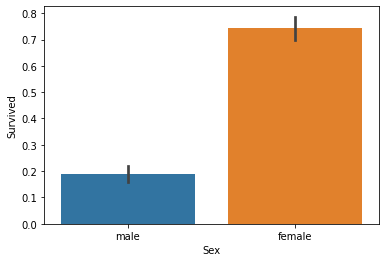

In [238]:
# Barplot
sbn.barplot(x="Sex", y="Survived", data=train)
plt.show()

Females are more likely to be survived than males.

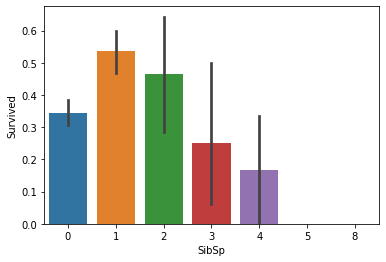

In [239]:
sbn.barplot(x='SibSp', y='Survived', data=train)
plt.show()

Sibsp =1 is more likely to survive.

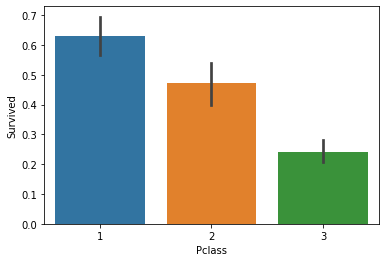

In [240]:
sbn.barplot(x='Pclass', y='Survived', data=train)
plt.show()

In [241]:
# correlation matrix
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Pclass = 1 is more likely to survive.

*Data Cleaning*

Steps for predicting unknown age values:
1. Create a combined dataset of train and test.
2. Assign NaN values in Age label to -0.5. 
3. Create a new column AgeGroup.
4. Extract titles from Name column.
5.Replace titles with the more general names.
6. Map Title names to numeric numbers and fillna with 0.
7. predict the missing Age values from the most common age for their Title by calculting mode.
8.Fill the unknown values
9. Map AgeGroup values to numeric.


In [242]:
 # Age

## As the test data is also missing the age values therfore we have fill the age value there too.

# Thus lets combine both datasets and fill the missing age values.

combined = [train, test]

# Filling the missing age values with -0.5
for dataset in combined:
  dataset['Age'] = dataset['Age'].fillna(-0.5)

# creating a new column named AgeGroup
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
for dataset in combined:
  dataset['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Extracting the Titles from each names
for dataset in combined:
  dataset['Title'] = dataset['Name'].str.extract(', ([A-Za-z]+)\.', expand=False)

# Replacing the titles with the more general names
for dataset in combined:
  dataset['Title'] = dataset['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Jonkheer', 'Sir', 'Capt', 'Don', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
  dataset['Title'] = dataset['Title'].replace('Lady', 'Mrs')

#print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).count())

# Mapping each value to the the numerical value
title_mapping = {'Master':1, 'Miss':2, 'Mr':3, 'Mrs':4, 'Rare':5}
for dataset in combined:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

#Next, we'll try to predict the missing Age values from the most common age for their Title

master_age = train[train['Title']==1]['AgeGroup'].mode()
#print(master_age)
# Master_age = baby

miss_age = train[train['Title']==2]['AgeGroup'].mode()
#print(miss_age)
# miss_age = Student

mr_age = train[train['Title']==3]['AgeGroup'].mode()
#print(mr_age)
# mr_age= Young Adult

mrs_age = train[train['Title']==4]['AgeGroup'].mode()
#print(mrs_age)
# mrs_age=Adult

rare_age = train[train['Title']==5]['AgeGroup'].mode()
#print(rare_age)
# rare_age = adult

age_title_mapping = {1:'Baby', 2:'Student', 3:'Young Adult', 4:'Adult', 5:'Adult'}

for x in range(len(train)):
  if train['AgeGroup'][x] == 'Unknown':
    train['AgeGroup'][x] = age_title_mapping[train['Title'][x]]
 
for x in range(len(test)):
  if test['AgeGroup'][x] == 'Unknown':
    test['AgeGroup'][x] = age_title_mapping[test['Title'][x]]

# Thus we have filled the unknown values.
age_value_maping = {'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}

for dataset in combined:
  dataset['AgeGroup'] = dataset['AgeGroup'].map(age_value_maping)


 Dropping the featues which are of no use.

In [243]:
train = train.drop(['PassengerId','Name', 'Age', 'Ticket', 'Cabin', 'Title'], axis=1)
test = test.drop(['Name', 'Age', 'Ticket', 'Cabin', 'Title'], axis=1)

Emabarked Feature

In [244]:
print(train['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


As we can easily see that most people embarked from S and therefore filling the missing values with S.

In [245]:
train = train.fillna({'Embarked': 'S'})

In [246]:
print(train.describe(include='all'))

          Survived      Pclass   Sex       SibSp       Parch        Fare Embarked    AgeGroup
count   891.000000  891.000000   891  891.000000  891.000000  891.000000      891  891.000000
unique         NaN         NaN     2         NaN         NaN         NaN        3         NaN
top            NaN         NaN  male         NaN         NaN         NaN        S         NaN
freq           NaN         NaN   577         NaN         NaN         NaN      646         NaN
mean      0.383838    2.308642   NaN    0.523008    0.381594   32.204208      NaN    4.636364
std       0.486592    0.836071   NaN    1.102743    0.806057   49.693429      NaN    1.353390
min       0.000000    1.000000   NaN    0.000000    0.000000    0.000000      NaN    1.000000
25%       0.000000    2.000000   NaN    0.000000    0.000000    7.910400      NaN    4.000000
50%       0.000000    3.000000   NaN    0.000000    0.000000   14.454200      NaN    5.000000
75%       1.000000    3.000000   NaN    1.000000    0.000000

Thus all the missing values in train are filled

In [247]:
print(test.describe(include='all'))

        PassengerId      Pclass   Sex       SibSp       Parch        Fare Embarked    AgeGroup
count    418.000000  418.000000   418  418.000000  418.000000  417.000000      418  418.000000
unique          NaN         NaN     2         NaN         NaN         NaN        3         NaN
top             NaN         NaN  male         NaN         NaN         NaN        S         NaN
freq            NaN         NaN   266         NaN         NaN         NaN      270         NaN
mean    1100.500000    2.265550   NaN    0.447368    0.392344   35.627188      NaN    4.559809
std      120.810458    0.841838   NaN    0.896760    0.981429   55.907576      NaN    1.415065
min      892.000000    1.000000   NaN    0.000000    0.000000    0.000000      NaN    1.000000
25%      996.250000    1.000000   NaN    0.000000    0.000000    7.895800      NaN    4.000000
50%     1100.500000    3.000000   NaN    0.000000    0.000000   14.454200      NaN    5.000000
75%     1204.750000    3.000000   NaN    1.000000 

One value in the fare feature is still missing

In [248]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass   Sex  SibSp  Parch  Fare Embarked  AgeGroup
152         1044       3  male      0      0   NaN        S       6.0


As the fare of passenger form the third class is missing and therefore filling that wit the mean fare of class 3

In [249]:
for x in range(len(test)):
  if pd.isnull(test['Fare'][x]):
    pclass = test['Pclass'][x]
    test['Fare'][x] = test[test['Pclass']==pclass]['Fare'].mean()

In [250]:
Embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(Embarked_mapping)
test['Embarked'] = test['Embarked'].map(Embarked_mapping)

Thus all the missing values are filled

Mapping the fare values into the group of features

In [251]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test.Fare, 4, labels=[1, 2, 3, 4])

In [252]:
train = train.drop('Fare', axis=1)
test = test.drop('Fare', axis=1)

In [253]:
sex_mapping = {'male':1, 'female':2}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
print(train)

     Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup FareBand
0           0       3    1      1      0         1       4.0        1
1           1       1    2      1      0         2       6.0        4
2           1       3    2      0      0         1       5.0        2
3           1       1    2      1      0         1       5.0        4
4           0       3    1      0      0         1       5.0        2
..        ...     ...  ...    ...    ...       ...       ...      ...
886         0       2    1      0      0         1       5.0        2
887         1       1    2      0      0         1       4.0        3
888         0       3    2      1      2         1       4.0        3
889         1       1    1      0      0         2       5.0        3
890         0       3    1      0      0         3       5.0        1

[891 rows x 8 columns]


In [254]:
print(train)

     Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup FareBand
0           0       3    1      1      0         1       4.0        1
1           1       1    2      1      0         2       6.0        4
2           1       3    2      0      0         1       5.0        2
3           1       1    2      1      0         1       5.0        4
4           0       3    1      0      0         1       5.0        2
..        ...     ...  ...    ...    ...       ...       ...      ...
886         0       2    1      0      0         1       5.0        2
887         1       1    2      0      0         1       4.0        3
888         0       3    2      1      2         1       4.0        3
889         1       1    1      0      0         2       5.0        3
890         0       3    1      0      0         3       5.0        1

[891 rows x 8 columns]


In [255]:
print(test)

     PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup FareBand
0            892       3    1      0      0         3       4.0        1
1            893       3    2      1      0         1       6.0        1
2            894       2    1      0      0         3       5.0        2
3            895       3    1      0      0         1       5.0        2
4            896       3    2      1      1         1       5.0        2
..           ...     ...  ...    ...    ...       ...       ...      ...
413         1305       3    1      0      0         1       5.0        2
414         1306       1    2      0      0         2       6.0        4
415         1307       3    1      0      0         1       5.0        1
416         1308       3    1      0      0         1       5.0        2
417         1309       3    1      1      1         2       3.0        3

[418 rows x 8 columns]


In [256]:
train['AgeGroup'] = train['AgeGroup'].astype(int)
test['AgeGroup'] = test['AgeGroup'].astype(int)

In [257]:
print(test.dtypes)

PassengerId       int64
Pclass            int64
Sex               int64
SibSp             int64
Parch             int64
Embarked          int64
AgeGroup          int64
FareBand       category
dtype: object


Now the data is ready

Chosing the best model

In [258]:
# Split out the validation
array = train.values
X = array[:, 1:]
Y = array[:, 0]

x_train, x_valid, y_train, y_valid  = train_test_split(X, Y, test_size=0.20, random_state=7)

In [259]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [260]:
# Spot check algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, scoring=scoring, cv=kfold)
  results.append(cv_results)
  names.append(name)
  msg = '%s : %f (%f)'%(name, cv_results.mean(), cv_results.std())
  print(msg)

LR : 0.799276 (0.055345)
SVC : 0.842782 (0.049759)
GNB : 0.810387 (0.045515)
KNN : 0.802093 (0.060636)
DTC : 0.790806 (0.061877)
RFC : 0.821694 (0.042392)
SGD : 0.761307 (0.065761)


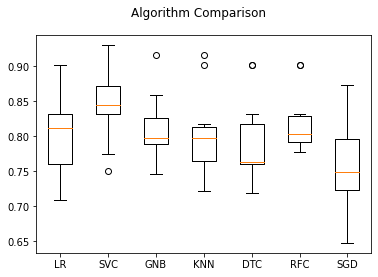

In [261]:
# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [262]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scalar', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledSVC', Pipeline([('Scalar', StandardScaler()), ('SVC', SVC())])))
pipelines.append(('ScaledGNB', Pipeline([('Scalar', StandardScaler()), ('GNB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scalar', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDTC', Pipeline([('Scalar', StandardScaler()), ('DTC', DecisionTreeClassifier())])))
pipelines.append(('ScaledRFC', Pipeline([('Scalar', StandardScaler()), ('RFC', RandomForestClassifier())])))
pipelines.append(('ScaledSGD', Pipeline([('Scalar', StandardScaler()), ('SGD', SGDClassifier())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = '%s with %f (%f)'%(name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR with 0.806260 (0.053231)
ScaledSVC with 0.841412 (0.050960)
ScaledGNB with 0.810387 (0.045515)
ScaledKNN with 0.818955 (0.051751)
ScaledDTC with 0.792214 (0.065088)
ScaledRFC with 0.817527 (0.044359)
ScaledSGD with 0.782297 (0.057769)


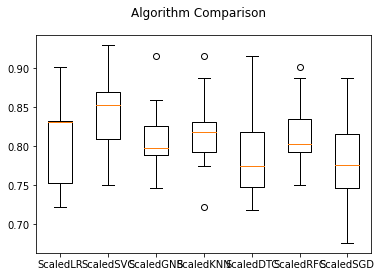

In [263]:
# Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [264]:
# Tune SVM
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 1.9, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, cv=kfold, param_grid=param_grid, scoring=scoring)
grid_result = grid.fit(rescaled_x, y_train)
print('Best: %f using %s'%(grid_result.best_score_, grid_result.best_params_))

Best: 0.847007 using {'C': 0.3, 'kernel': 'rbf'}


Finalize Model

In [265]:
scaler = StandardScaler()
rescaled_x = scaler.fit_transform(x_train)
model = SVC(C=0.3)
model.fit(rescaled_x, y_train)

rescaled_x_valid = scaler.fit_transform(x_valid)
predictions = model.predict(rescaled_x_valid)
print(accuracy_score(y_valid, predictions))

0.7653631284916201


Creating a submission file

In [266]:
ids = test.PassengerId
predictions = model.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame(({'PassengerId': ids, 'Survived': predictions}))
output.to_csv('submission.csv', index=False)